![BTS](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/img/Logo-BTS.jpg?raw=1)

# Session 7: Geospatial Analysis with Python

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/07_Geospatial_Analysis_with_Python.ipynb)

**Resources:**

* [GeoPandas](http://geopandas.org/)
* [Fiona](https://github.com/Toblerity/Fiona)
* [Rasterio](https://github.com/mapbox/rasterio)
* [Shapely](https://github.com/Toblerity/Shapely)
* [A Gentle Introduction to GIS](https://docs.qgis.org/3.4/en/docs/gentle_gis_introduction/index.html)

# Geospatial analysis

Geospatial analysis is the gathering, display, and manipulation of imagery, GPS, satellite photography and historical data, described explicitly in terms of geographic coordinates or implicitly, in terms of a street address, postal code, or forest stand identifier as they are applied to geographic models. Geospatial analysis can be found in almost every industry, including real estate, oil and gas, agriculture, defense, politics, health, transportation, and oceanography.

# Geographic information systems (GIS)

There are now dozens of **graphical user interface (GUI)** geospatial desktop applications available today from companies including Esri, ERDAS, Intergraph, and ENVI, to name a few. Esri is the oldest, continuously operating GIS software company, which started in the late 1960s. In the open source realm, packages including [QGIS](https://qgis.org) and [GRASS](https://grass.osgeo.org) are widely used. Beyond comprehensive desktop software packages, software libraries for the building of new software exist in the thousands.

# Geospatial analysis and computer programming

Modern geospatial analysis can be conducted with the click of a button in any of the easy-to-use commercial or open source geospatial packages. So then, why would you want to use a programming language to learn this field? The most important reasons are as follows:

* You want complete control of the underlying algorithms, data, and execution
* You want to automate specific, repetitive analysis tasks with minimal overhead from a large, multipurpose geospatial framework
* You want to create a program that's easy to share
* You want to learn geospatial analysis beyond pushing buttons in software

The geospatial industry is gradually **moving away** from the traditional workflow in which teams of analysts use expensive desktop software to produce geospatial products. Geospatial analysis is being pushed towards automated processes that reside in the cloud. End user software is moving towards task-specific tools, many of which are accessed from mobile devices. Knowledge of geospatial concepts and data as well as the ability to build custom geospatial processes is where the geospatial work in the near future lies.

# Data Models for GIS

In order to visualize natural phenomena, one must first determine how to best represent geographic space. Data models are a set of rules and/or constructs used to describe and represent aspects of the real world in a computer. Two primary data models are available to complete this task: **raster data models** and **vector data
models**.

## Vector data

**Vector** data provide a way to represent real world **features** within the GIS environment. A feature is anything you can see on the landscape. Imagine you are standing on the top of a hill. Looking down you can see houses, roads, trees, rivers, and so on. Each one of these things would be a **feature** when we represent them in a GIS Application. Vector features have **attributes**, which consist of text or numerical information that **describe** the features.

A vector feature has its shape represented using **geometry**. The geometry is made up of one or more interconnected **vertices**. A vertex describes a position in space using an **X**, **Y** and optionally **Z** axis.

<table>
    <tr>
        <td><img src="https://docs.qgis.org/3.4/en/_images/point_feature.png"></td>
        <td><img src="https://docs.qgis.org/3.4/en/_images/polyline_feature.png"></td>
        <td><img src="https://docs.qgis.org/3.4/en/_images/polygon_feature.png"></td>
    </tr>
</table>

## Raster data

While vector features use geometry (points, polylines and polygons) to represent the real world, raster data takes a different approach. Rasters are made up of a matrix of pixels (also called cells), each containing a value that represents the conditions for the area covered by that cell.

<table>
    <tr>
        <td><img src="https://docs.qgis.org/3.4/en/_images/raster_dataset.png" style="width: 200px;"></td>
    </tr>
</table>


# Spatial Reference Systems (SRS)

A spatial reference system (SRS) or coordinate reference system (CRS) is a coordinate-based local, regional or global system used to locate geographical entities.

Example of SRS definition:

```
+proj=utm +zone=30 +datum=WGS84 +units=m +no_defs 
```

The [European Petroleum Survey Group](http://www.epsg.org/) (EPSG) has a huge set of predefined spatial references, each given a unique ID. These ID’s are used throughout the industry and you can download the database with all them from their website, as well as some very good documents on projection. The most commonly used SRSs:

* [WGS84](http://epsg.io/4326)
* [Spherical Mercator](http://epsg.io/3857)

# GeoPandas

In [1]:
import geopandas as gp

In [2]:
%matplotlib inline

## Reading and Writing Files

GeoPandas can read almost any vector-based spatial data format including ESRI shapefile, GeoJSON files and more using the command:

```
geopandas.read_file()
```

Any arguments passed to `read_file()` after the file name will be passed directly to `fiona.open`, which does the actual data importation. In general, `read_file` is pretty smart and should do what you want without extra arguments, but for more help, type:

```
import fiona; help(fiona.open)
```

In [3]:
regions = gp.read_file("data/division_regional/division_regional.shp")

In [4]:
regions.crs

{'init': 'epsg:32719'}

In [5]:
airports = gp.read_file("https://www.bcn.cl/obtienearchivo?id=repositorio/10221/10395/2/Aeropuertos.zip")

In [6]:
airports.crs

{'init': 'epsg:3857'}

GeoDataFrames can be exported to many different standard formats using the `GeoDataFrame.to_file()` method. For a full list of supported formats, type:

```
import fiona; fiona.supported_drivers
```

In [7]:
regions.to_file("/tmp/regions.gpkg", driver="GPKG")

In [8]:
airports.to_file("/tmp/airports.geojson", driver="GeoJSON")

## Data Structures

GeoPandas implements two main data structures, a `GeoSeries` and a `GeoDataFrame`. These are subclasses of pandas `Series` and `DataFrame`, respectively.

### GeoSeries

GeoPandas has three basic classes of geometric objects (which are actually *shapely* objects):

* Points / Multi-Points
* Lines / Multi-Lines
* Polygons / Multi-Polygons

Note that all entries in a `GeoSeries` need not be of the same geometric type, although certain export operations will fail if this is not the case.

In [9]:
type(airports)

geopandas.geodataframe.GeoDataFrame

In [10]:
type(airports.geometry)

geopandas.geoseries.GeoSeries

#### Attributes

The GeoSeries class implements nearly all of the attributes and methods of `Shapely` objects.

In [11]:
gs = regions.geometry.loc[0:1]
type(gs)

geopandas.geoseries.GeoSeries

In [12]:
type(regions.geometry.loc[1])

shapely.geometry.polygon.Polygon

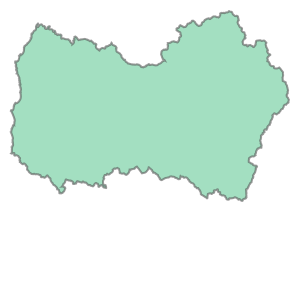

In [13]:
regions.geometry.loc[1]

In [14]:
gs.area

0    1.066060e+08
1    1.634521e+10
dtype: float64

In [15]:
gs.bounds

,minx,miny,maxx,maxy
0,-599322.7019,6.195312e+06,-407295.6503,6.237546e+06
1,219775.8022,6.125390e+06,407237.4753,6.253480e+06


In [16]:
gs.total_bounds

array([-599322.7019, 6125389.8437,  407237.4753, 6253480.0787])

In [17]:
gs.length

0    143877.052306
1    803163.596453
dtype: float64

In [18]:
gs.geom_type

0    MultiPolygon
1         Polygon
dtype: object

In [19]:
regions.geometry.loc[12:14].is_valid

12     True
13     True
14    False
dtype: bool

In [20]:
gs.centroid

0    POINT (-508178.596 6216162.562)
1     POINT (311941.053 6187603.863)
dtype: geometry

#### Basic Methods

In [21]:
gs.distance(airports.geometry.loc[0:2])

0    1.175116e+07
1    1.481657e+07
2             NaN
dtype: float64

In [22]:
gs.representative_point()

0    POINT (-412400.543 6232898.905)
1     POINT (312771.841 6189421.162)
dtype: geometry

In [23]:
gs.to_crs(4326)

0    MULTIPOLYGON (((-80.78822 -33.72046, -80.78818...
1    POLYGON ((-70.42742 -33.85486, -70.42699 -33.8...
Name: geometry, dtype: geometry

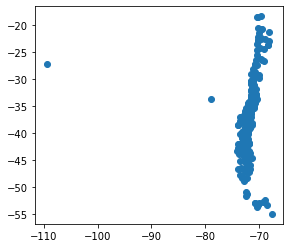

In [24]:
airports.to_crs(4326).plot()

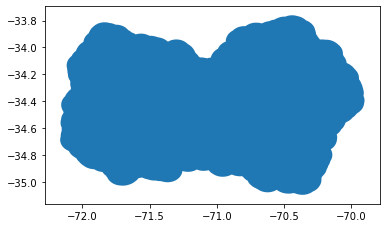

In [25]:
regions.loc[[1]].buffer(10000).to_crs(4326).plot()

#### Excercise

Plot region \#2 rotated by 90 degrees.

#### Relationship Tests

In [26]:
regions.to_crs(3857).loc[[0]].geometry.contains(airports.loc[313]['geometry'])

0    True
dtype: bool